In [1]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import copy, math


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [5]:
data.shape

(4340, 8)

In [6]:
data.describe()

,year,selling_price,km_driven
count,4332.000000,4.325000e+03,4333.000000
mean,2013.090259,5.044126e+05,66236.430649
std,4.213690,5.793743e+05,46660.795071
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.049990e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4332 non-null   object 
 1   year           4332 non-null   float64
 2   selling_price  4325 non-null   float64
 3   km_driven      4333 non-null   float64
 4   fuel           4329 non-null   object 
 5   seller_type    4332 non-null   object 
 6   transmission   4330 non-null   object 
 7   owner          4323 non-null   object 
dtypes: float64(3), object(5)
memory usage: 271.4+ KB


In [8]:
data.isna().sum()

name              8
year              8
selling_price    15
km_driven         7
fuel             11
seller_type       8
transmission     10
owner            17
dtype: int64

# Data Preprossing

In [9]:
#dropping the rows

data = data.dropna(axis = 0, subset = ['name', 'year','selling_price', 'fuel', 'seller_type', 'transmission','owner'])
print("Shape after dropping:", data.shape)

Shape after dropping: (4268, 8)


In [10]:
#imputing missing values

impute = SimpleImputer(missing_values=np.nan, strategy='mean')  #nan gula missing hisabe consider korbo mean dia.

impute.fit(data[['km_driven']])  #it has to be 2D to pass as a dataframe

data['km_driven'] = impute.transform(data[['km_driven']])   #calculated mean value ai ata te replace korbo

In [11]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
#Label-> selling price

data['selling_price'].value_counts()  #unique selling price count

300000.0    159
250000.0    124
350000.0    117
550000.0    104
600000.0     99
           ... 
458000.0      1
381000.0      1
751000.0      1
321000.0      1
865000.0      1
Name: selling_price, Length: 443, dtype: int64

In [13]:
bins=[20000,250000,400000,9000000]   #range a vaag kora

In [14]:
labels=['low','medium','high']    #range er lebelling kora

In [15]:
data['selling_price']=pd.cut(data['selling_price'], bins, labels=labels)   #lebel assigning to senning price

In [16]:
data['selling_price'].value_counts()

high      1883
low       1472
medium     912
Name: selling_price, dtype: int64

In [17]:
data.isna().sum()

name             0
year             0
selling_price    1
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [18]:
data = data.dropna(axis = 0, subset = ['selling_price'])

In [19]:
#Encoding categorical features

le = LabelEncoder()

data['name'] = le.fit_transform(data['name'])

data['selling_price'] = data['selling_price'].map({'low':0, 'medium':1, 'high':2})

data['transmission'] = le.fit_transform(data['transmission']) #binary

data['owner'] = data['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4,
                                   'Third Owner':3, 'Test Drive Car':0})  #ordinal categorical

In [20]:
data['fuel'] = data['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})

data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

In [21]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,767,2007.0,0,70000.0,0,0,1,1
1,1031,2007.0,0,50000.0,0,0,1,1
2,501,2012.0,2,100000.0,1,0,1,1
3,116,2017.0,0,46000.0,0,0,1,1
4,276,2014.0,2,141000.0,1,0,1,2


In [22]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4267 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4267 non-null   int64   
 1   year           4267 non-null   float64 
 2   selling_price  4267 non-null   category
 3   km_driven      4267 non-null   float64 
 4   fuel           4267 non-null   int64   
 5   seller_type    4267 non-null   int64   
 6   transmission   4267 non-null   int64   
 7   owner          4267 non-null   int64   
dtypes: category(1), float64(2), int64(5)
memory usage: 271.0 KB


In [24]:
data['selling_price']=data['selling_price'].astype(int)

# Data Visualization

In [25]:
from scipy.stats import norm
from scipy import stats

In [26]:
#skewness
print("Skewness: %f" % data['selling_price'].skew())

Skewness: -0.188553


Skewness < 0 – Left skewed distribution – most values are concentrated on the right of the mean, with extreme values to the left.

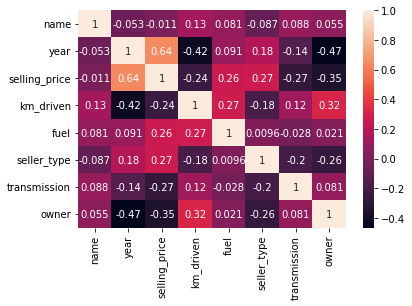

In [27]:
plt.figure()
sns.heatmap(data.corr(), annot=True)

plt.show()

year, fuel, seller type is higly coorelated with selling price

In [28]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(data,names='selling_price',title='Proportion Low, Medium, High car price',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

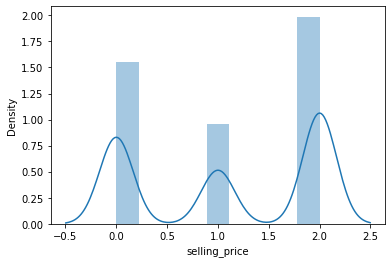

In [29]:
#histogram
sns.distplot(data['selling_price']);

In [30]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

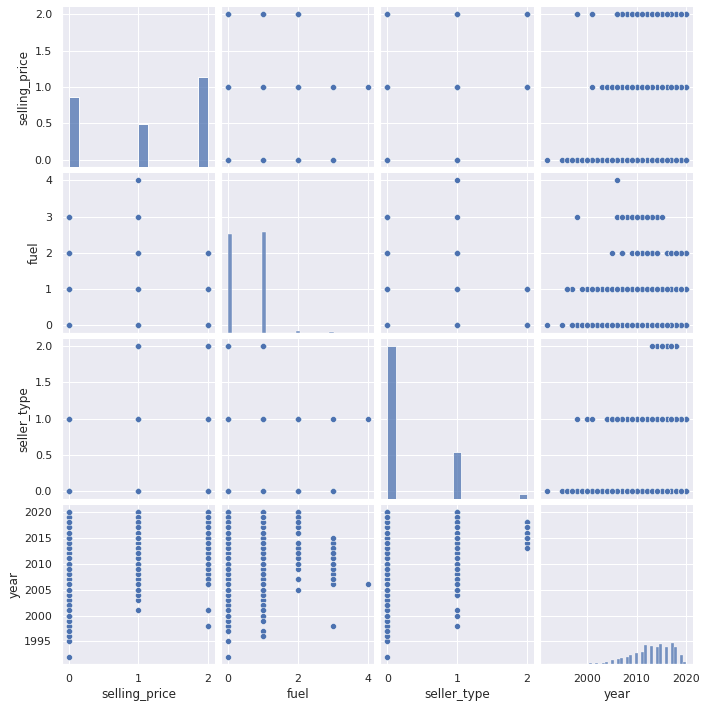

In [31]:
#scatterplot
sns.set()
cols = ['selling_price', 'fuel', 'seller_type', 'year']
sns.pairplot(data[cols], height = 2.5)
plt.show();

In [32]:
fig = px.bar(data, x='selling_price', y='year',title='Price Vs Year',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

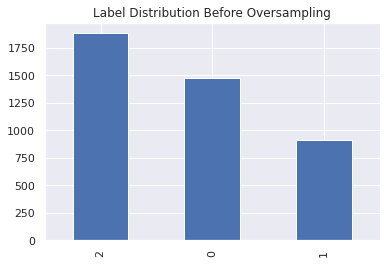

In [33]:
data['selling_price'].value_counts().plot(kind='bar', title='Label Distribution Before Oversampling')

In [34]:
#oversampling  (sob gula k soman value banabo)

class_0 = data[data['selling_price'] == 0]
class_1 = data[data['selling_price'] == 1]
class_2 = data[data['selling_price'] == 2]

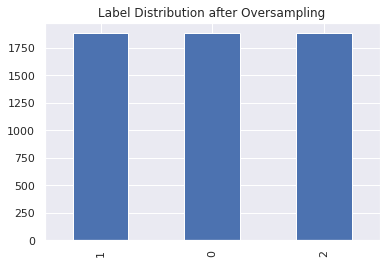

In [35]:
class_1_over = class_1.sample(len(class_2), replace=True)
class_0_over = class_0.sample(len(class_2), replace=True)

df_new = pd.concat([class_1_over,class_0_over, class_2], axis=0)

df_new['selling_price'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [36]:
df_new['selling_price'].value_counts()

1    1883
0    1883
2    1883
Name: selling_price, dtype: int64

In [37]:
df_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3975,995,2009.0,1,120000.0,1,0,1,2
825,449,2015.0,1,90000.0,0,0,1,2
676,635,2011.0,1,140000.0,1,0,1,1
3283,239,2016.0,1,60826.0,0,1,1,1
3595,703,2009.0,1,155000.0,1,0,0,3


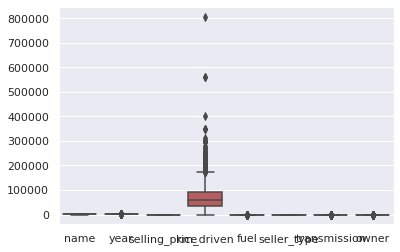

In [38]:
import seaborn as sns
sns.boxplot(data=data)

## **Feature** Scaling

In [39]:
Y = data['selling_price']
X = data.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)
X

,year,fuel,seller_type
0,2007.0,0,0
1,2007.0,0,0
2,2012.0,1,0
3,2017.0,0,0
4,2014.0,1,0
...,...,...,...
4335,2014.0,1,0
4336,2014.0,1,0
4337,2009.0,0,0
4338,2016.0,1,0


In [40]:
X.sample(7)

,year,fuel,seller_type
1778,2020.0,1,1
2849,2009.0,0,0
1401,2016.0,1,0
3161,2016.0,0,1
725,2014.0,0,1
2288,2019.0,0,1
2522,2018.0,1,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)    #data k vag kortasi where 20% will go for test

In [42]:
#KNN class call kore fit a x,y train k dilam

from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.66


## **MinMaxScaler**

In [44]:
scaler = MinMaxScaler()  #minmax er object create
scaler.fit(X_train)      #object er upor fit function call,jai value scale korbo ta pass kora

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("MinMax Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

MinMax Scaled test set accuracy: 0.65


## **Standard** Scaler

In [45]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Standard test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Standard test accuracy: 0.66


Accuracy is higher without scaling

# train/test split

In [46]:
Y = df_new['selling_price']  
X = df_new.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)

X_features = data.columns

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
accuracies = {}
#print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

In [48]:
predictions1 = knn.predict(X_test)
a1=accuracy_score(y_test, predictions1)
print(a1)
accuracies['KNN'] = a1

0.620353982300885


In [49]:
#test and predicted value same ki na
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions1
pred_df

,True values,Predicted values
2941,1,1
408,0,1
1395,1,2
1753,0,0
3998,0,1
...,...,...
1685,1,0
67,0,0
2756,2,2
749,2,2


In [50]:
#cla
classificationreport = classification_report(y_test, predictions1) 
print(classificationreport)

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       362
           1       0.50      0.66      0.57       407
           2       0.76      0.55      0.64       361

    accuracy                           0.62      1130
   macro avg       0.66      0.62      0.63      1130
weighted avg       0.65      0.62      0.62      1130



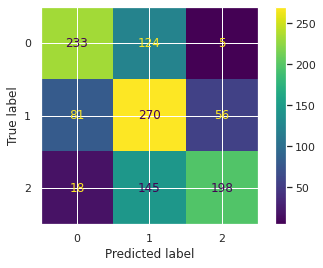

In [51]:
cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Logistic Regression

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions2 = lr.predict(X_test)
a2=accuracy_score(y_test, predictions2)
print(a2)
accuracies['Logistic Regression'] = a2

0.4327433628318584


In [54]:
classificationreport = classification_report(y_test, predictions2) 
print(classificationreport)

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       362
           1       0.00      0.00      0.00       407
           2       0.41      0.81      0.55       361

    accuracy                           0.43      1130
   macro avg       0.29      0.45      0.35      1130
weighted avg       0.28      0.43      0.34      1130



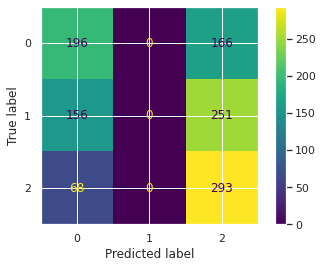

In [55]:
cm = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# SVM

In [56]:
from sklearn.svm import SVC

In [57]:
mode = SVC()

In [58]:
mode.fit(X_train,y_train)

SVC()

In [59]:
predictions3 = mode.predict(X_test)
a3=accuracy_score(y_test, predictions3)
print(a3)
accuracies['SVM'] = a3

0.31946902654867254


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
predictions4 = clf.predict(X_test)
a4=accuracy_score(predictions4,y_test)
print(a4)
accuracies['Decision Tree'] = a4

0.643362831858407


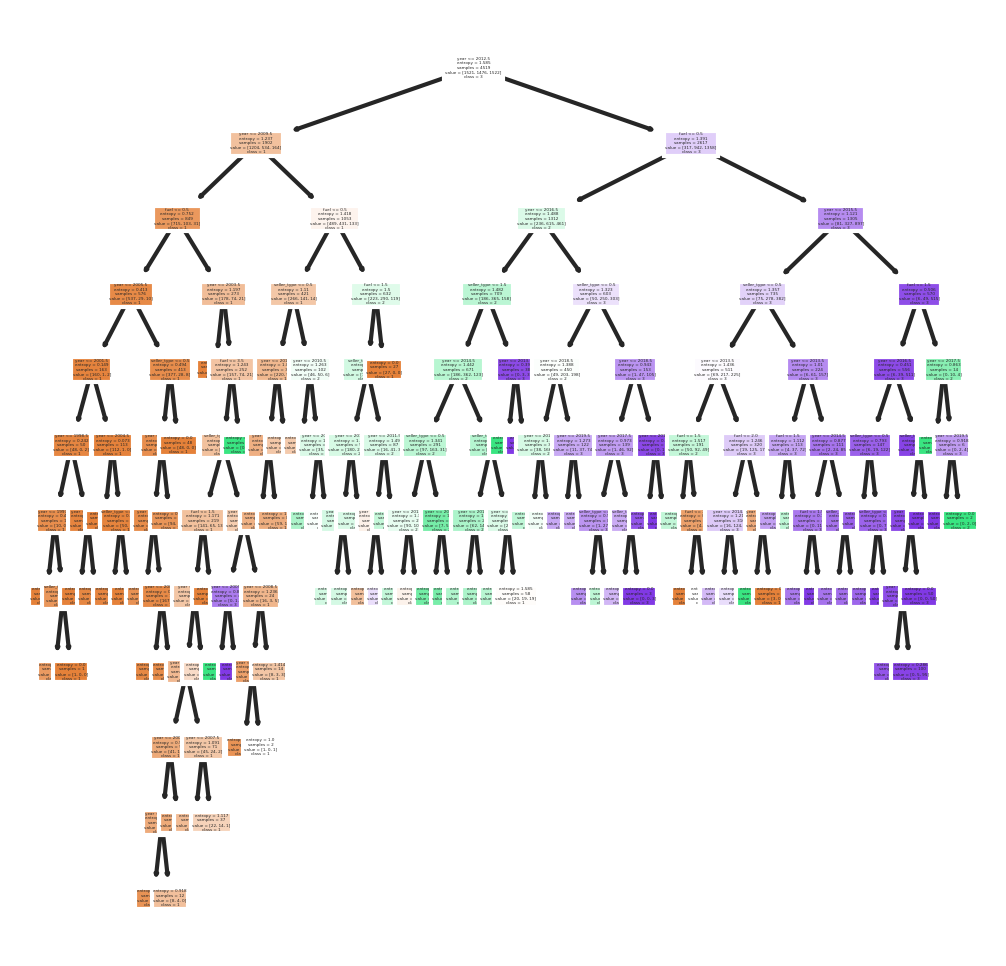

In [61]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['1','2','3'],
               filled = True);

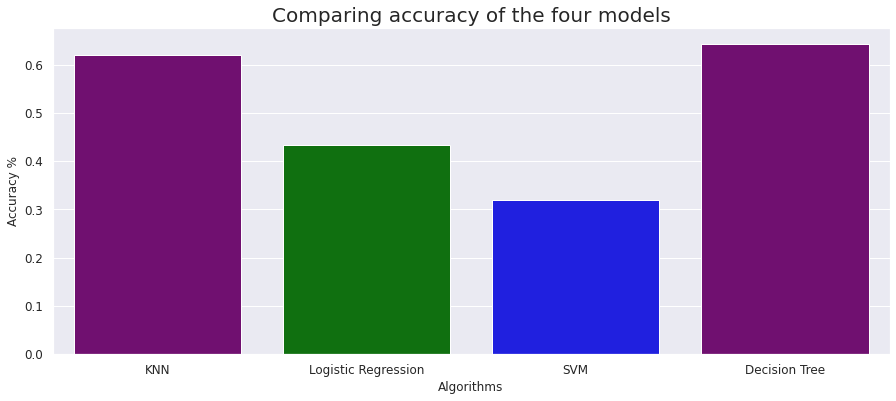

In [62]:
colors = ["purple", "green", "blue"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

# Model testing

In [63]:
X_test

,year,fuel,seller_type
2941,2012.0,0,1
408,2010.0,1,0
1395,2014.0,1,1
1753,2009.0,0,1
3998,2014.0,0,0
...,...,...,...
1685,2013.0,1,0
67,2009.0,0,1
2756,2019.0,0,0
749,2017.0,1,0


In [65]:
#Maruti Celerio Green VXI 2017	365000	78000	CNG	Individual	Manual	First Owner
#1
input_data = [2017,2,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = input_data_reshaped

prediction = knn.predict(std_data)
print(prediction)


if (prediction[0]==1):
    print('The prediction is Real')
else:
    print('The prediction is Fake')

[1]
The prediction is Real
